# Programming Pay Prediction 2024

Now let's look at the final question of interest.  That is - What will be the average pay for certain programming languages next year (2024) and are they related to the most popular programming languages / average pay for those programming languages from previous years?

In [361]:
# import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns

%matplotlib inline


In [362]:
# read in and gather data from csv

df_2017 = pd.read_csv('.\data\stack-overflow-developer-survey-2017\survey_results_public.csv')
df_2018 = pd.read_csv('.\data\stack-overflow-developer-survey-2018\survey_results_public.csv')
df_2019 = pd.read_csv('.\data\stack-overflow-developer-survey-2019\survey_results_public.csv')
df_2020 = pd.read_csv('.\data\stack-overflow-developer-survey-2020\survey_results_public.csv')
df_2021 = pd.read_csv('.\data\stack-overflow-developer-survey-2021\survey_results_public.csv')
df_2022 = pd.read_csv('.\data\stack-overflow-developer-survey-2022\survey_results_public.csv')
df_2023 = pd.read_csv('.\data\stack-overflow-developer-survey-2023\survey_results_public.csv')
df_2018.head()

C:\Users\quart\AppData\Local\Temp\ipykernel_13404\1604620373.py:4: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2018 = pd.read_csv('.\data\stack-overflow-developer-survey-2018\survey_results_public.csv')


,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy


In [363]:
# data previously assessed to ensure the columns match up or can be amended to match if needed - we can see that 'MainBranch' is the same i.e. if they are a developer or not
# however 'LanguageHaveWorkedWith' is named 'LanguageWorkedWith' in 2020 and 2019

# assessing the data previously to ensure the categorical values match up or can be amended to match if needed - 
# we can saw that 'Bash/Shell (all shells)' needs to be changed to 'Bash/Shell/PowerShell' and
# 'PowerShell' needs to be changed to 'Bash/Shell/PowerShell' plus 'LISP' to 'Lisp'

# create new dataframes where the 'LanguageHaveWorkedWith' column is split into an array of strings instead of a list of languages

df_2023_temp = df_2023
df_2023_temp['LanguageHaveWorkedWith'] = df_2023_temp['LanguageHaveWorkedWith'].str.split(';')
df_2022_temp = df_2022
df_2022_temp['LanguageHaveWorkedWith'] = df_2022_temp['LanguageHaveWorkedWith'].str.split(';')
df_2021_temp = df_2021
df_2021_temp['LanguageHaveWorkedWith'] = df_2021_temp['LanguageHaveWorkedWith'].str.split(';')
df_2020_temp = df_2020
df_2020_temp['LanguageWorkedWith'] = df_2020_temp['LanguageWorkedWith'].str.split(';')
df_2019_temp = df_2019
df_2019_temp['LanguageWorkedWith'] = df_2019_temp['LanguageWorkedWith'].str.split(';')

In [364]:
# get pay data
#create developer only dataframe
developers_23 = df_2023_temp.loc[df_2023_temp['MainBranch'] == 'I am a developer by profession']
developers_22 = df_2022_temp.loc[df_2022_temp['MainBranch'] == 'I am a developer by profession']
developers_21 = df_2021_temp.loc[df_2021_temp['MainBranch'] == 'I am a developer by profession']
developers_20 = df_2020_temp.loc[df_2020_temp['MainBranch'] == 'I am a developer by profession']
developers_19 = df_2019_temp.loc[df_2019_temp['MainBranch'] == 'I am a developer by profession']

# drop nas split into list and explode into rows
language_median_pay_dev_23 = developers_23[['LanguageHaveWorkedWith', 'ConvertedCompYearly']].dropna(axis=0, how='any').explode('LanguageHaveWorkedWith').replace({'Bash/Shell (all shells)': 'Bash/Shell/PowerShell', 'LISP' : 'Lisp', 'Bash/Shell': 'Bash/Shell/PowerShell', 'PowerShell': 'Bash/Shell/PowerShell'})
language_median_pay_dev_22 = developers_22[['LanguageHaveWorkedWith', 'ConvertedCompYearly']].dropna(axis=0, how='any').explode('LanguageHaveWorkedWith').replace({'Bash/Shell (all shells)': 'Bash/Shell/PowerShell', 'LISP' : 'Lisp', 'Bash/Shell': 'Bash/Shell/PowerShell', 'PowerShell': 'Bash/Shell/PowerShell'})
language_median_pay_dev_21 = developers_21[['LanguageHaveWorkedWith', 'ConvertedCompYearly']].dropna(axis=0, how='any').explode('LanguageHaveWorkedWith').replace({'Bash/Shell (all shells)': 'Bash/Shell/PowerShell', 'LISP' : 'Lisp', 'Bash/Shell': 'Bash/Shell/PowerShell', 'PowerShell': 'Bash/Shell/PowerShell'})
language_median_pay_dev_20 = developers_20[['LanguageWorkedWith', 'ConvertedComp']].dropna(axis=0, how='any').explode('LanguageWorkedWith').replace({'Bash/Shell (all shells)': 'Bash/Shell/PowerShell', 'LISP' : 'Lisp', 'Bash/Shell': 'Bash/Shell/PowerShell', 'PowerShell': 'Bash/Shell/PowerShell'}).rename(columns={'ConvertedComp': 'ConvertedCompYearly', 'LanguageWorkedWith': 'LanguageHaveWorkedWith'})
language_median_pay_dev_19 = developers_19[['LanguageWorkedWith', 'ConvertedComp']].dropna(axis=0, how='any').explode('LanguageWorkedWith').replace({'Bash/Shell (all shells)': 'Bash/Shell/PowerShell', 'LISP' : 'Lisp', 'Bash/Shell': 'Bash/Shell/PowerShell', 'PowerShell': 'Bash/Shell/PowerShell'}).rename(columns={'ConvertedComp': 'ConvertedCompYearly', 'LanguageWorkedWith': 'LanguageHaveWorkedWith'})

# median pay for each year for each language
language_median_pay_dev_23 = language_median_pay_dev_23.groupby(['LanguageHaveWorkedWith']).median().reset_index()
language_median_pay_dev_22 = language_median_pay_dev_22.groupby(['LanguageHaveWorkedWith']).median().reset_index()
language_median_pay_dev_21 = language_median_pay_dev_21.groupby(['LanguageHaveWorkedWith']).median().reset_index()
language_median_pay_dev_20 = language_median_pay_dev_20.groupby(['LanguageHaveWorkedWith']).median().reset_index()
language_median_pay_dev_19 = language_median_pay_dev_19.groupby(['LanguageHaveWorkedWith']).median().reset_index()

# combine median pay for each year for each language into one df
def combine_df(dataframes, years):
    '''
    INPUT:
    dataframes - a list of the pandas dataframes you want to combine
    years - the list of years that each dataframe represents
    
    OUTPUT:
    new_df - a combined data frame with the rows of each added onto the end and a new column year to distinguish the data from each dataframe
    '''
    for df, year in zip(dataframes, years):
        df['year'] = year
    new_df = pd.concat(dataframes, axis=0)
    return new_df

df_pay = combine_df([language_median_pay_dev_23, language_median_pay_dev_22, language_median_pay_dev_21, language_median_pay_dev_20, language_median_pay_dev_19],
                [2023, 2022, 2021, 2020, 2019]).rename(columns={'LanguageHaveWorkedWith': 'language', 'count': 'LanguageHaveWorkedWithProp'})

# create additional column that shows language and year
df_pay['languageAndYear'] = df_pay['language'] + " " + df_pay['year'].astype(str)

# create additional column that shows previous years pay
def previous_year(df, value_name):
    '''
    INPUT:
    df - a pandas dataframe you want to work with
    value_name - the column name list you want the previous years data for
    
    OUTPUT:
    previous_year - the previous years data as a list with zero for those where the previous years data is unavailable
    '''
    previous_year = []
    for _, row in df.iterrows():
        try:
            prev = df[df.languageAndYear == row.language + " " + str(row.year - 1)][value_name].values[0]
        except:
            prev = 0
        previous_year.append(prev)
    return previous_year

df_pay['ConvertedCompPrevYear'] = previous_year(df_pay, "ConvertedCompYearly")

In [365]:
# get percentage languages used
# drop nas split into list and explode into rows
language_count_dev_23 = developers_23.LanguageHaveWorkedWith.dropna(axis=0, how='any').explode().replace({'Bash/Shell (all shells)': 'Bash/Shell/PowerShell', 'LISP' : 'Lisp', 'Bash/Shell': 'Bash/Shell/PowerShell', 'PowerShell': 'Bash/Shell/PowerShell'})
language_count_dev_22 = developers_22.LanguageHaveWorkedWith.dropna(axis=0, how='any').explode().replace({'Bash/Shell (all shells)': 'Bash/Shell/PowerShell', 'LISP' : 'Lisp', 'Bash/Shell': 'Bash/Shell/PowerShell', 'PowerShell': 'Bash/Shell/PowerShell'})
language_count_dev_21 = developers_21.LanguageHaveWorkedWith.dropna(axis=0, how='any').explode().replace({'Bash/Shell (all shells)': 'Bash/Shell/PowerShell', 'LISP' : 'Lisp', 'Bash/Shell': 'Bash/Shell/PowerShell', 'PowerShell': 'Bash/Shell/PowerShell'})
language_count_dev_20 = developers_20.LanguageWorkedWith.dropna(axis=0, how='any').explode().replace({'Bash/Shell (all shells)': 'Bash/Shell/PowerShell', 'LISP' : 'Lisp', 'Bash/Shell': 'Bash/Shell/PowerShell', 'PowerShell': 'Bash/Shell/PowerShell'})
language_count_dev_19 = developers_19.LanguageWorkedWith.dropna(axis=0, how='any').explode().replace({'Bash/Shell (all shells)': 'Bash/Shell/PowerShell', 'LISP' : 'Lisp', 'Bash/Shell': 'Bash/Shell/PowerShell', 'PowerShell': 'Bash/Shell/PowerShell'})

#count values
language_count_dev_23 = (language_count_dev_23.value_counts()  / developers_23.LanguageHaveWorkedWith.dropna(axis=0, how='any').shape[0]).reset_index()
language_count_dev_22 = (language_count_dev_22.value_counts()  / developers_22.LanguageHaveWorkedWith.dropna(axis=0, how='any').shape[0]).reset_index()
language_count_dev_21 = (language_count_dev_21.value_counts()  / developers_21.LanguageHaveWorkedWith.dropna(axis=0, how='any').shape[0]).reset_index()
language_count_dev_20 = (language_count_dev_20.value_counts()  / developers_20.LanguageWorkedWith.dropna(axis=0, how='any').shape[0]).reset_index().rename(columns={'LanguageWorkedWith': 'LanguageHaveWorkedWith'})
language_count_dev_19 = (language_count_dev_19.value_counts()  / developers_19.LanguageWorkedWith.dropna(axis=0, how='any').shape[0]).reset_index().rename(columns={'LanguageWorkedWith': 'LanguageHaveWorkedWith'})

#combine all percentage languages used for each year into one df
df_language_count_dev = combine_df([language_count_dev_23, language_count_dev_22, language_count_dev_21, language_count_dev_20, language_count_dev_19],
                [2023, 2022, 2021, 2020, 2019]).rename(columns={'LanguageHaveWorkedWith': 'language', 'count': 'LanguageHaveWorkedWithProp'})

# create additional column that shows language and year
df_language_count_dev['languageAndYear'] = df_language_count_dev['language'] + " " + df_language_count_dev['year'].astype(str)

# create additional column that shows previous years percentage languages used
df_language_count_dev['LanguageHaveWorkedWithPropPrevYear'] = previous_year(df_language_count_dev, "LanguageHaveWorkedWithProp")
df_language_count_dev = df_language_count_dev.drop(['language','year'], axis=1)
print(df_language_count_dev)


    LanguageHaveWorkedWithProp             languageAndYear  \
0                     0.659406             JavaScript 2023   
1                     0.529276               HTML/CSS 2023   
2                     0.516083                    SQL 2023   
3                     0.464375  Bash/Shell/PowerShell 2023   
4                     0.454006                 Python 2023   
..                         ...                         ...   
23                    0.016301                 Elixir 2019   
24                    0.015764                Clojure 2019   
25                    0.011597                     F# 2019   
26                    0.011413            WebAssembly 2019   
27                    0.009529                 Erlang 2019   

    LanguageHaveWorkedWithPropPrevYear  
0                             0.679511  
1                             0.549777  
2                             0.526822  
3                             0.415800  
4                             0.435471  
..       

In [366]:
# get percentage languages want to work with
# drop nas split into list and explode into rows
language_want_count_dev_23 = developers_23.LanguageWantToWorkWith.dropna(axis=0, how='any').str.split(';').explode().replace({'Bash/Shell (all shells)': 'Bash/Shell/PowerShell', 'LISP' : 'Lisp', 'Bash/Shell': 'Bash/Shell/PowerShell', 'PowerShell': 'Bash/Shell/PowerShell'})
language_want_count_dev_22 = developers_22.LanguageWantToWorkWith.dropna(axis=0, how='any').str.split(';').explode().replace({'Bash/Shell (all shells)': 'Bash/Shell/PowerShell', 'LISP' : 'Lisp', 'Bash/Shell': 'Bash/Shell/PowerShell', 'PowerShell': 'Bash/Shell/PowerShell'})
language_want_count_dev_21 = developers_21.LanguageWantToWorkWith.dropna(axis=0, how='any').str.split(';').explode().replace({'Bash/Shell (all shells)': 'Bash/Shell/PowerShell', 'LISP' : 'Lisp', 'Bash/Shell': 'Bash/Shell/PowerShell', 'PowerShell': 'Bash/Shell/PowerShell'})
language_want_count_dev_20 = developers_20.LanguageDesireNextYear.dropna(axis=0, how='any').str.split(';').explode().replace({'Bash/Shell (all shells)': 'Bash/Shell/PowerShell', 'LISP' : 'Lisp', 'Bash/Shell': 'Bash/Shell/PowerShell', 'PowerShell': 'Bash/Shell/PowerShell'})
language_want_count_dev_19 = developers_19.LanguageDesireNextYear.dropna(axis=0, how='any').str.split(';').explode().replace({'Bash/Shell (all shells)': 'Bash/Shell/PowerShell', 'LISP' : 'Lisp', 'Bash/Shell': 'Bash/Shell/PowerShell', 'PowerShell': 'Bash/Shell/PowerShell'})
#count values
language_want_count_dev_23 = (language_want_count_dev_23.value_counts() / developers_23.LanguageWantToWorkWith.dropna(axis=0, how='any').shape[0]).reset_index()
language_want_count_dev_22 = (language_want_count_dev_22.value_counts() / developers_22.LanguageWantToWorkWith.dropna(axis=0, how='any').shape[0]).reset_index()
language_want_count_dev_21 = (language_want_count_dev_21.value_counts() / developers_21.LanguageWantToWorkWith.dropna(axis=0, how='any').shape[0]).reset_index()
language_want_count_dev_20 = (language_want_count_dev_20.value_counts() / developers_20.LanguageDesireNextYear.dropna(axis=0, how='any').shape[0]).reset_index().rename(columns={'LanguageDesireNextYear': 'LanguageWantToWorkWith'})
language_want_count_dev_19 = (language_want_count_dev_19.value_counts() / developers_19.LanguageDesireNextYear.dropna(axis=0, how='any').shape[0]).reset_index().rename(columns={'LanguageDesireNextYear': 'LanguageWantToWorkWith'})

df_language_want_count_dev = combine_df([language_want_count_dev_23, language_want_count_dev_22, language_want_count_dev_21, language_want_count_dev_20, language_want_count_dev_19],
                [2023, 2022, 2021, 2020, 2019]).rename(columns={'LanguageWantToWorkWith': 'language', 'count': 'LanguageWantToWorkWithProp'})

# create additional column that shows language and year
df_language_want_count_dev['languageAndYear'] = df_language_want_count_dev['language'] + " " + df_language_want_count_dev['year'].astype(str)

# create additional column that shows previous years percentage languages want to work
df_language_want_count_dev['LanguageWantToWorkWithPropPrevYear'] = previous_year(df_language_want_count_dev, "LanguageWantToWorkWithProp")
df_language_want_count_dev = df_language_want_count_dev.drop(['language','year'], axis=1)
print(df_language_want_count_dev)

    LanguageWantToWorkWithProp   languageAndYear  \
0                     0.435761   JavaScript 2023   
1                     0.428187   TypeScript 2023   
2                     0.392764       Python 2023   
3                     0.378356          SQL 2023   
4                     0.365979     HTML/CSS 2023   
..                         ...               ...   
23                    0.037483     Assembly 2019   
24                    0.035055      Clojure 2019   
25                    0.033473  Objective-C 2019   
26                    0.026363       Erlang 2019   
27                    0.012175          VBA 2019   

    LanguageWantToWorkWithPropPrevYear  
0                             0.470647  
1                             0.423423  
2                             0.398136  
3                             0.382368  
4                             0.372491  
..                                 ...  
23                            0.000000  
24                            0.000000  
25    

In [367]:
# combine all into one df joining on common column 'languageAndYear'
df = df_pay.set_index('languageAndYear').join(df_language_count_dev.set_index('languageAndYear')).join(df_language_want_count_dev.set_index('languageAndYear'))
df.head()

,language,ConvertedCompYearly,year,ConvertedCompPrevYear,LanguageHaveWorkedWithProp,LanguageHaveWorkedWithPropPrevYear,LanguageWantToWorkWithProp,LanguageWantToWorkWithPropPrevYear
languageAndYear,,,,,,,,
APL 2023,APL,80092.0,2023,71629.5,0.001584,0.004674,0.003159,0.005593
Ada 2023,Ada,71502.0,2023,0.0,0.006529,0.000000,0.006011,0.000000
Apex 2023,Apex,80317.0,2023,0.0,0.006439,0.000000,0.004770,0.000000
Assembly 2023,Assembly,78207.0,2023,76783.0,0.044283,0.045028,0.033811,0.031892
Bash/Shell/PowerShell 2023,Bash/Shell/PowerShell,85655.0,2023,80448.0,0.464375,0.415800,0.291910,0.256862


Now we have all the required data in one dataframe we need to check the correlation of pay against previous year pay, the percentage popularity working with and percentage want to work with from previous year.

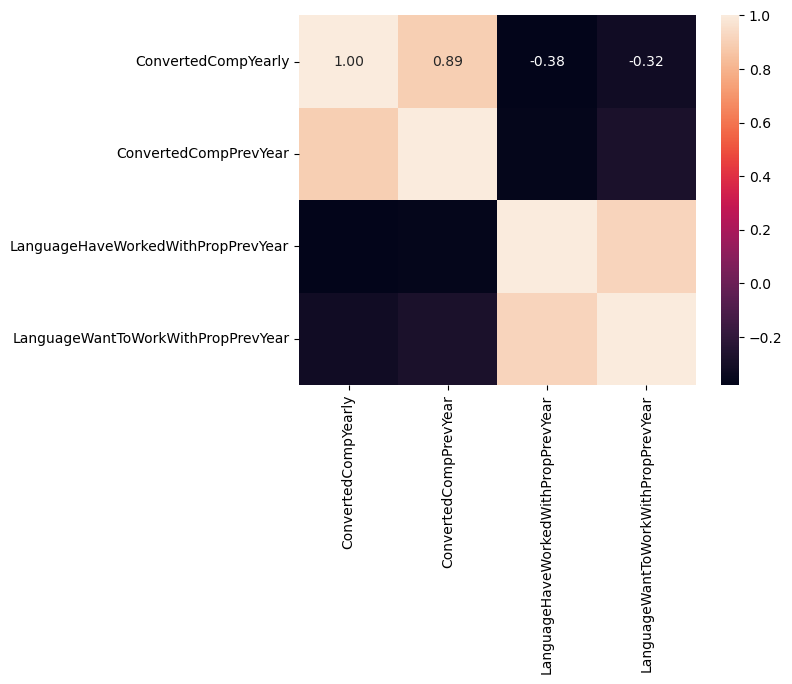

In [368]:
# only looking at languages that have a compensation value for the previous year
df_temp = df[df.ConvertedCompPrevYear != 0]

# create heatmap
sns.heatmap(df_temp[['ConvertedCompYearly', 'ConvertedCompPrevYear', 'LanguageHaveWorkedWithPropPrevYear', 'LanguageWantToWorkWithPropPrevYear']].corr(), annot=True, fmt=".2f");

So it looks like the previous years pay is strongly positively corelated with the next years pay and there is a weak negative correlation with the percentage popularity working with and percentage want to work with from previous year. Presumably because the more people available to work on a language the less a company will need to pay to attract candidates.

I will now look at the correlation with all previous years and see if these will help further with prediction.

In [369]:

# create column 'ConvertedCompYearly', 'LanguageWantToWorkWithProp', 'LanguageHaveWorkedWithProp' for each year for comparison
def previous_years_cols(df, value_names, years):
    '''
    INPUT:
    df - a pandas dataframe you want to work with
    value_names - the column names you want the previous years data for
    years - the years you want the data for
    
    OUTPUT:
    previous_year - the previous years data as a dataframe with zero for those where the previous years data is unavailable and the year appended to the column name
    '''
    temps = []
    for val in value_names:
        for year in years:
            temp = df[df.year == year][[val, 'language']].dropna(axis=0, how='any')
            temp = temp.rename(columns={val: val + "_" + str(year)})
            temps.append(temp)
    
    previous_years = pd.DataFrame(temps[0].set_index('language'))
    for i in range(1,len(temps)):
        previous_years = previous_years.join(temps[i].set_index('language'), how ='outer')
    return previous_years


temp = previous_years_cols(df, ['ConvertedCompYearly', 'LanguageWantToWorkWithProp', 'LanguageHaveWorkedWithProp'], [2023, 2022, 2021, 2020, 2019]).dropna(axis=0, how='any')
temp.head()

,ConvertedCompYearly_2023,ConvertedCompYearly_2022,ConvertedCompYearly_2021,ConvertedCompYearly_2020,ConvertedCompYearly_2019,LanguageWantToWorkWithProp_2023,LanguageWantToWorkWithProp_2022,LanguageWantToWorkWithProp_2021,LanguageWantToWorkWithProp_2020,LanguageWantToWorkWithProp_2019,LanguageHaveWorkedWithProp_2023,LanguageHaveWorkedWithProp_2022,LanguageHaveWorkedWithProp_2021,LanguageHaveWorkedWithProp_2020,LanguageHaveWorkedWithProp_2019
language,,,,,,,,,,,,,,,
Assembly,78207.0,76783.0,58368.0,53448.0,52000.0,0.033811,0.031892,0.030243,0.033166,0.037483,0.044283,0.045028,0.040695,0.047362,0.048610
Bash/Shell/PowerShell,85655.0,80448.0,71093.0,66000.0,68970.0,0.291910,0.256862,0.236469,0.215264,0.246501,0.464375,0.415800,0.386373,0.340732,0.370668
C,74963.0,67550.0,54000.0,51000.0,52248.0,0.099065,0.092463,0.090524,0.090311,0.106953,0.166853,0.167123,0.166583,0.178975,0.170512
C#,74963.0,69318.0,58368.0,56774.0,58881.0,0.238034,0.240817,0.236542,0.260169,0.276411,0.292158,0.297421,0.298398,0.336227,0.331786
C++,75000.0,69318.0,54049.0,54049.0,54996.0,0.147703,0.146787,0.147183,0.150084,0.166709,0.202441,0.201866,0.199641,0.204307,0.203695


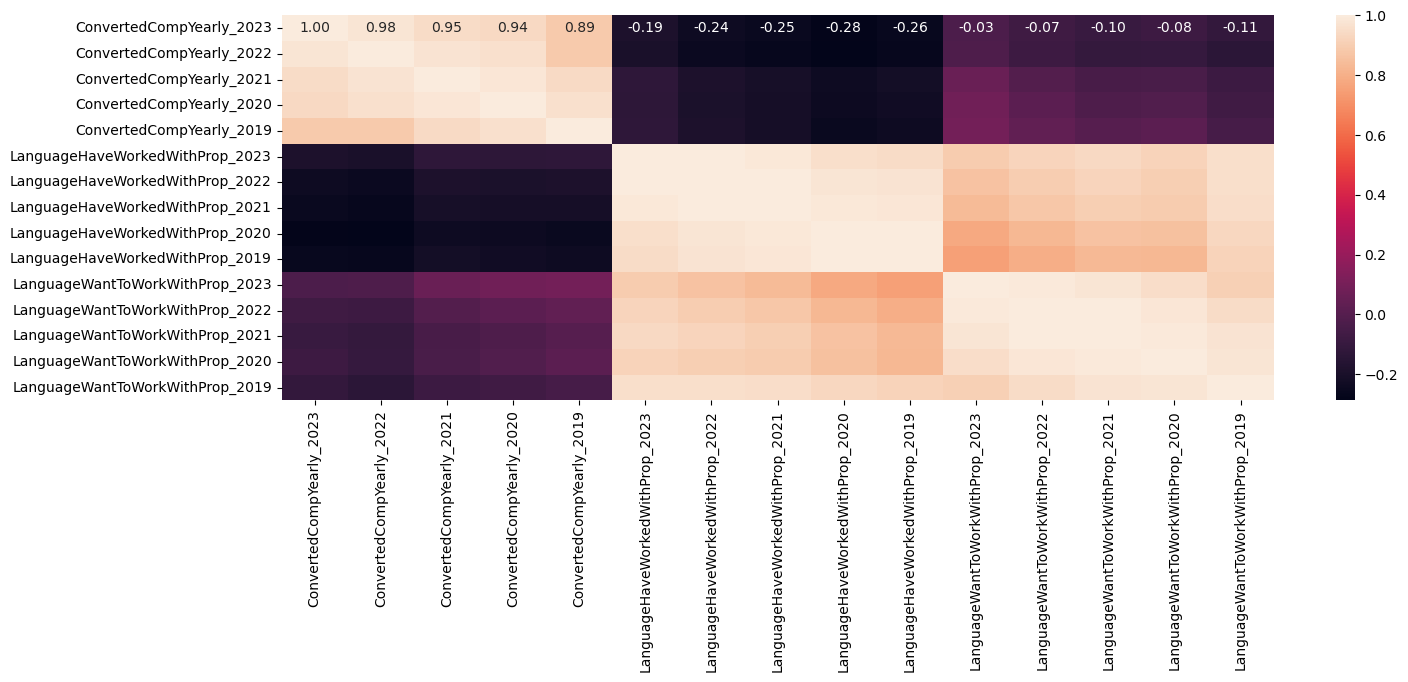

In [370]:
# create heatmap
plt.figure(figsize=(16,5))
sns.heatmap(temp[['ConvertedCompYearly_2023', 'ConvertedCompYearly_2022', 'ConvertedCompYearly_2021', 'ConvertedCompYearly_2020', 'ConvertedCompYearly_2019',
                     'LanguageHaveWorkedWithProp_2023', 'LanguageHaveWorkedWithProp_2022', 'LanguageHaveWorkedWithProp_2021', 'LanguageHaveWorkedWithProp_2020', 'LanguageHaveWorkedWithProp_2019',
                     'LanguageWantToWorkWithProp_2023', 'LanguageWantToWorkWithProp_2022', 'LanguageWantToWorkWithProp_2021', 'LanguageWantToWorkWithProp_2020', 'LanguageWantToWorkWithProp_2019']]
            .corr(), annot=True, fmt=".2f");

we have lost some data as we have had to remove the languages that do not have full data for the last 5 years, however interestingly it has brought up a reducing positive correlation as we go back through the previous years comp, and an increasingly negative correlation as we go back through the years of languages people have worked with or wanted to work with, the loss of data has weakened these correlations and strengthened the comp correlations.

It looks like it may be best to start looking at the model just using the previous years data as more languages will be possible to predict as we will not need data going back as far.

In [371]:
# model - lm with previous year comp plus LanguageHaveWorkedWithPropPrevYear and LanguageWantToWorkWithPropPrevYear

X = df_temp[['ConvertedCompPrevYear', 'LanguageHaveWorkedWithPropPrevYear', 'LanguageWantToWorkWithPropPrevYear', 'year']]
y = df_temp[['ConvertedCompYearly', 'year']]

# use 2023 as the test
X_test = X[X.year == 2023][['ConvertedCompPrevYear', 'LanguageHaveWorkedWithPropPrevYear', 'LanguageWantToWorkWithPropPrevYear']]
y_test = y[y.year == 2023]['ConvertedCompYearly']
                
X_train = X[X.year != 2023][['ConvertedCompPrevYear', 'LanguageHaveWorkedWithPropPrevYear', 'LanguageWantToWorkWithPropPrevYear']]
y_train = y[y.year != 2023]['ConvertedCompYearly']

lm_model = LinearRegression() 
lm_model.fit(X_train, y_train) 


y_test_preds = lm_model.predict(X_test) #We can then use our fitted model to predict the comp for each
                                        #language in our test set, and see how well these predictions
                                        #match the truth.

print(r2_score(y_test, y_test_preds)) #In this case we are predicting a continuous, numeric response.
print(mean_squared_error(y_test, y_test_preds)) #metrics to assess fit include Rsquared and MSE.

0.6047357808691504
52251669.03958644


In [372]:
preds_vs_act = pd.DataFrame(np.hstack([y_test.values.reshape(y_test.size,1), y_test_preds.reshape(y_test.size,1)]))
preds_vs_act.columns = ['actual', 'preds']
preds_vs_act['diff'] = preds_vs_act['actual'] - preds_vs_act['preds']
preds_vs_act.head()

,actual,preds,diff
0,80092.0,80004.126045,87.873955
1,78207.0,85331.059474,-7124.059474
2,85655.0,87315.420973,-1660.420973
3,74963.0,74993.705209,-30.705209
4,74963.0,74527.857902,435.142098


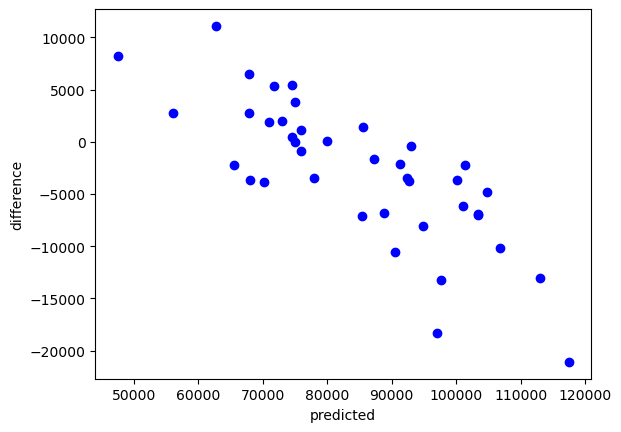

In [373]:
plt.plot(preds_vs_act['preds'], preds_vs_act['diff'], 'bo');
plt.xlabel('predicted');
plt.ylabel('difference');

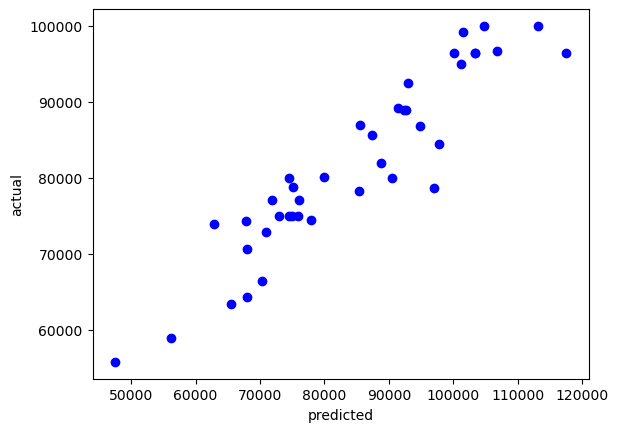

In [374]:
plt.plot(preds_vs_act['preds'], preds_vs_act['actual'], 'bo');
plt.xlabel('predicted');
plt.ylabel('actual');

The R2 for the current model is fairly good but the MSE is a bit too high. I will try normalizing the variables prior to training and testing.

In [375]:
# normalize
def normalize_col(col):
    '''
    INPUT:
    col - a series you want to normalise
    
    OUTPUT:
    new_col - the column after normalising
    '''
    new_col = (col-col.mean())/col.std()
    return new_col 

# model - lm with previous year comp plus normalised LanguageHaveWorkedWithPropPrevYear and LanguageWantToWorkWithPropPrevYear

X = df_temp[['ConvertedCompPrevYear', 'LanguageHaveWorkedWithPropPrevYear', 'LanguageWantToWorkWithPropPrevYear', 'year']]
y = df_temp[['ConvertedCompYearly', 'year']]

X_test = X[X.year == 2023][['ConvertedCompPrevYear', 'LanguageHaveWorkedWithPropPrevYear', 'LanguageWantToWorkWithPropPrevYear']]
y_test = y[y.year == 2023]['ConvertedCompYearly']

X_test['LanguageHaveWorkedWithPropPrevYear'] = normalize_col(X_test['LanguageHaveWorkedWithPropPrevYear'])
X_test['LanguageWantToWorkWithPropPrevYear'] = normalize_col(X_test['LanguageWantToWorkWithPropPrevYear'])

X_train = X[X.year != 2023][['ConvertedCompPrevYear', 'LanguageHaveWorkedWithPropPrevYear', 'LanguageWantToWorkWithPropPrevYear']]
y_train = y[y.year != 2023]['ConvertedCompYearly']

X_train['LanguageHaveWorkedWithPropPrevYear'] = normalize_col(X_train['LanguageHaveWorkedWithPropPrevYear'])
X_train['LanguageWantToWorkWithPropPrevYear'] = normalize_col(X_train['LanguageWantToWorkWithPropPrevYear'])

lm_model = LinearRegression()
lm_model.fit(X_train, y_train) 

y_test_preds = lm_model.predict(X_test) #We can then use our fitted model to predict the comp for each
                                        #language in our test set, and see how well these predictions
                                        #match the truth.

print(r2_score(y_test, y_test_preds)) #In this case we are predicting a continuous, numeric response.
print(mean_squared_error(y_test, y_test_preds)) #metrics to assess fit include Rsquared and MSE.

0.6271393817687945
49290041.138944976


In [376]:
preds_vs_act = pd.DataFrame(np.hstack([y_test.values.reshape(y_test.size,1), y_test_preds.reshape(y_test.size,1)]))
preds_vs_act.columns = ['actual', 'preds']
preds_vs_act['diff'] = preds_vs_act['actual'] - preds_vs_act['preds']
preds_vs_act.head()

,actual,preds,diff
0,80092.0,79399.843188,692.156812
1,78207.0,84728.520379,-6521.520379
2,85655.0,86755.737906,-1100.737906
3,74963.0,74427.037602,535.962398
4,74963.0,73864.659883,1098.340117


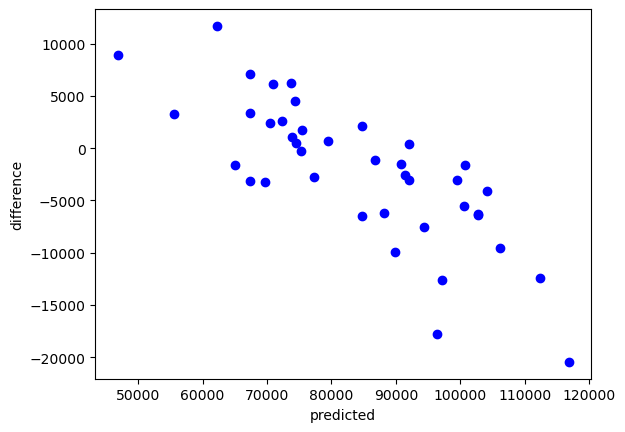

In [377]:
plt.plot(preds_vs_act['preds'], preds_vs_act['diff'], 'bo');
plt.xlabel('predicted');
plt.ylabel('difference');

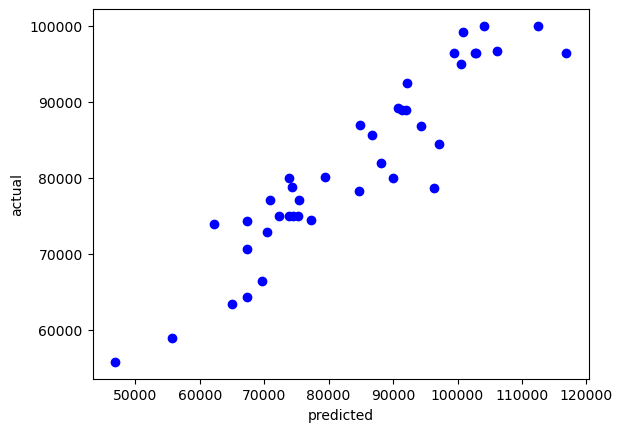

In [378]:
plt.plot(preds_vs_act['preds'], preds_vs_act['actual'], 'bo');
plt.xlabel('predicted');
plt.ylabel('actual');

The new model is slightly better, but I am not convinced it would be substantially better than just predicting the salaries by outputting the previous years salaries. When tested below we can see the new model is very slightly worse. Therefore with the current data we are unable to use the previous years language used popularity or language wanted to use popularity to predict next years salary. However looking back at our previous analysis we can see that there is a weak negative correlation with these that icreases as we go back further, so with more data in the same format, these two variables may become more useful predictive variables.

I will now explore the model using just the previous years comp

In [379]:

# model - using previous year comp to directly predict next year pay

X = df_temp[['ConvertedCompPrevYear', 'LanguageHaveWorkedWithPropPrevYear', 'LanguageWantToWorkWithPropPrevYear', 'year']]
y = df_temp[['ConvertedCompYearly', 'year']]

X_test = X[X.year == 2023]['ConvertedCompPrevYear']
y_test = y[y.year == 2023]['ConvertedCompYearly']

X_train = X[X.year != 2023]['ConvertedCompPrevYear']
y_train = y[y.year != 2023]['ConvertedCompYearly']


print(r2_score(y_test, X_test)) # In this case we are predicting a continuous, numeric response.
print(mean_squared_error(y_test, X_test)) # metrics to assess fit include Rsquared and MSE.

0.6391678266807974
47699949.51875


In [380]:
# model - lm model with previous year comp

X = df_temp[['ConvertedCompPrevYear', 'LanguageHaveWorkedWithPropPrevYear', 'LanguageWantToWorkWithPropPrevYear', 'year']]
y = df_temp[['ConvertedCompYearly', 'year']]

X_test =X[X.year == 2023][['ConvertedCompPrevYear']]
y_test = y[y.year == 2023]['ConvertedCompYearly']

X_train =X[X.year != 2023][['ConvertedCompPrevYear']]
y_train = y[y.year != 2023]['ConvertedCompYearly']

lm_model = LinearRegression()
lm_model.fit(X_train, y_train)

y_test_preds = lm_model.predict(X_test) # We can then use our fitted model to predict the comp for each
                                        # language in our test set, and see how well these predictions
                                        # match the truth.

print(r2_score(y_test, y_test_preds)) # In this case we are predicting a continuous, numeric response.
print(mean_squared_error(y_test, y_test_preds)) # metrics to assess fit include Rsquared and MSE.

0.6719795248978586
43362430.68227492


In [381]:
preds_vs_act = pd.DataFrame(np.hstack([y_test.values.reshape(y_test.size,1), y_test_preds.reshape(y_test.size,1)]))
preds_vs_act.columns = ['actual', 'preds']
preds_vs_act['diff'] = preds_vs_act['actual'] - preds_vs_act['preds']
preds_vs_act.head()

,actual,preds,diff
0,80092.0,78097.020976,1994.979024
1,78207.0,83747.834641,-5540.834641
2,85655.0,87766.507791,-2111.507791
3,74963.0,73623.848502,1339.151498
4,74963.0,75562.460816,-599.460816


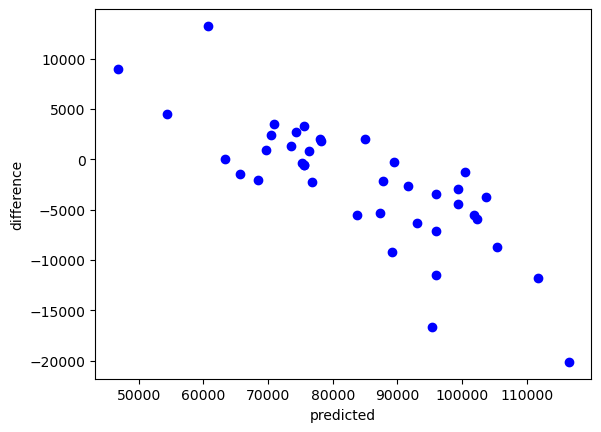

In [382]:
plt.plot(preds_vs_act['preds'], preds_vs_act['diff'], 'bo');
plt.xlabel('predicted');
plt.ylabel('difference');

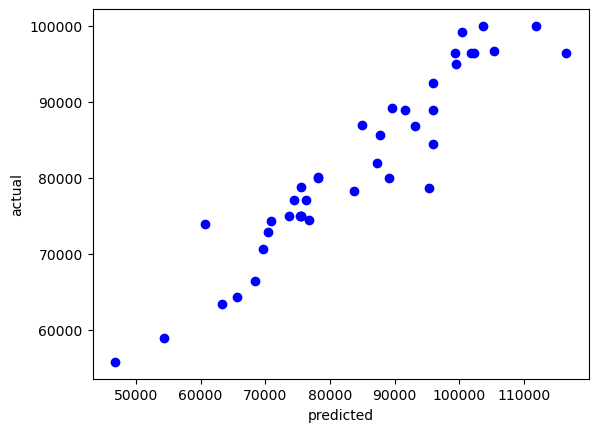

In [383]:
plt.plot(preds_vs_act['preds'], preds_vs_act['actual'], 'bo');
plt.xlabel('predicted');
plt.ylabel('actual');

This model is better than the previous model where we just used the previous years comp as the prediction, however I think it will improve with a log transform on the input and output variables to reduce the slight skewing we can see and the increased variability in differences towards the top end of salaries.

In [384]:
# model - lm model with previous year comp plus log transform

X = df_temp[['ConvertedCompPrevYear', 'LanguageHaveWorkedWithPropPrevYear', 'LanguageWantToWorkWithPropPrevYear', 'year']]
y = df_temp[['ConvertedCompYearly', 'year']]

X_test =np.log(X[X.year == 2023][['ConvertedCompPrevYear']])
y_test = np.log(y[y.year == 2023]['ConvertedCompYearly'])

X_train =np.log(X[X.year != 2023][['ConvertedCompPrevYear']])
y_train = np.log(y[y.year != 2023]['ConvertedCompYearly'])

lm_model = LinearRegression()
lm_model.fit(X_train, y_train)

y_test_preds = lm_model.predict(X_test) # We can then use our fitted model to predict the comp for each
                                        # language in our test set, and see how well these predictions
                                        # match the truth.
y_test = np.exp(y_test)
y_test_preds = np.exp(y_test_preds)
print(r2_score(y_test, y_test_preds)) # In this case we are predicting a continuous, numeric response.
print(mean_squared_error(y_test, y_test_preds)) # metrics to assess fit include Rsquared and MSE.

0.7036601688568395
39174430.749607995


In [385]:
preds_vs_act = pd.DataFrame(np.hstack([y_test.values.reshape(y_test.size,1), y_test_preds.reshape(y_test.size,1)]))
preds_vs_act.columns = ['actual', 'preds']
preds_vs_act['diff'] = preds_vs_act['actual'] - preds_vs_act['preds']
preds_vs_act.head()

,actual,preds,diff
0,80092.0,77486.698666,2605.301334
1,78207.0,83080.976045,-4873.976045
2,85655.0,87060.214766,-1405.214766
3,74963.0,73059.233960,1903.766040
4,74963.0,74977.930030,-14.930030


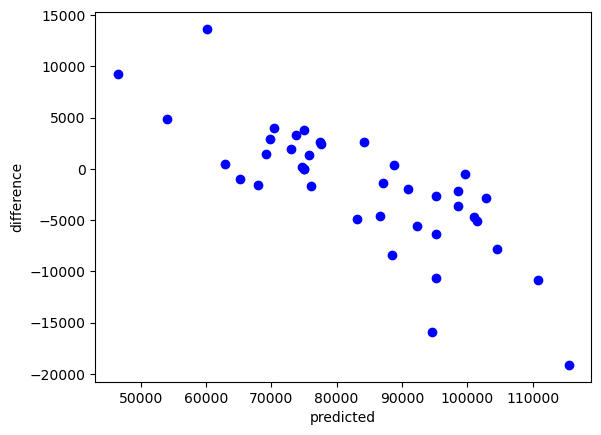

In [386]:
plt.plot(preds_vs_act['preds'], preds_vs_act['diff'], 'bo');
plt.xlabel('predicted');
plt.ylabel('difference');

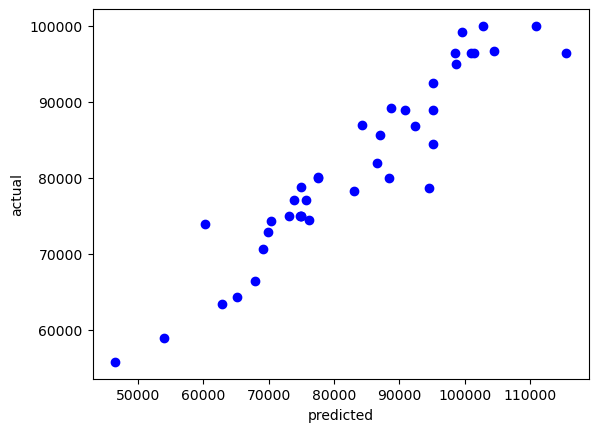

In [387]:
plt.plot(preds_vs_act['preds'], preds_vs_act['actual'], 'bo');
plt.xlabel('predicted');
plt.ylabel('actual');

This model is better than the previous model without the transformation, the log transform on the input appears to have removed the issue with skewness and th log transform on the output appears to have decreased MSE.

Finally we just need to make our comp predictions for 2024 by inputting 2023 comp

In [388]:
#filter out the 2023 data and change the column to ensure the model will process the 2023 data 
df = df_temp[df_temp.year == 2023][['ConvertedCompYearly']].rename(columns=({'ConvertedCompYearly': 'ConvertedCompPrevYear'}))

X_2024 =np.log(df)

y_2024_preds = lm_model.predict(X_2024)
y_2024_preds = np.exp(y_2024_preds)

# add predictions to the df
df["Comp2024"] = y_2024_preds

#sort values to get the top 5 best paying languages for next year (excluding those without a salary last year)
df.sort_values(by=["Comp2024"], ascending=False).head()

,ConvertedCompPrevYear,Comp2024
languageAndYear,,
F# 2023,100000.0,108298.294426
Erlang 2023,100000.0,108298.294426
Ruby 2023,99156.0,107381.201914
Lisp 2023,96657.0,104665.936766
Elixir 2023,96381.0,104366.065879
